Step 1: Map the problem to circuits and operators

In [1]:
from qiskit import QuantumCircuit

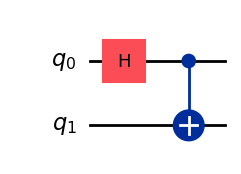

In [2]:
# Generating the bell state
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

In [3]:
from qiskit.quantum_info import Pauli

ZZ = Pauli("ZZ")
ZI = Pauli("ZI")
IZ = Pauli("IZ")
XX = Pauli("XX")
XI = Pauli("XI")
IX = Pauli("IX")

observables = [ZZ,ZI,IZ,XX,XI,IX]

Step 2: Optimize
Since we are running it on a aer simulator, so there is not need to optimize

Step 3: Execute on the backend

In [4]:
from qiskit_aer.primitives import Estimator

In [5]:
estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)
job.result()

EstimatorResult(values=array([ 1.        , -0.03710938, -0.03710938,  1.        , -0.00976562,
       -0.00976562]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0077901, 'sample_measure_time': 0.0021702, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 7975, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9986228942871094, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0077901, 'sample_measure_time': 0.002170

Step 4: Post Process (and Plotting)

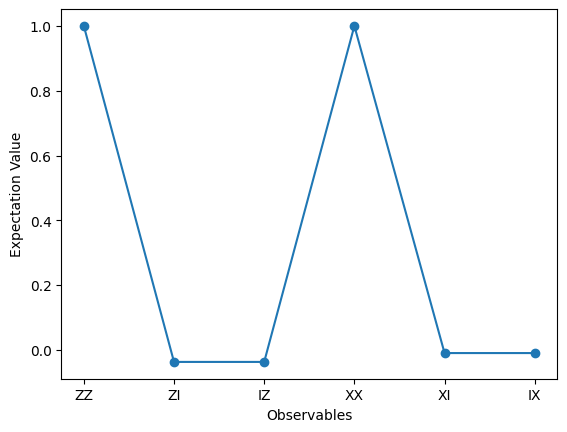

In [6]:
import matplotlib.pyplot as plt

data = ['ZZ','ZI','IZ','XX','XI','IX']
values = job.result().values

plt.plot(data, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Expectation Value")
plt.show()